In [20]:
import decode_eeg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sista
np.random.seed(42)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
experiment_name = 'C01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [22]:
time_window = 50
time_step = 25
trial_average = 5
n_splits = 300
group_dict = {0:[11],1:[13]}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=4)

In [23]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata,idx = wrangl.select_labels(xdata,ydata,return_idx=True)
        
    beh = exp.load_behavior(isub)
    quads = np.array([int(i[1]) for i in beh['Quadrants']],dtype=int)[idx]

    train_idx = ydata == 11
    xdata_train, ydata_train = xdata[train_idx], quads[train_idx]
    xdata_test, ydata_test = xdata[~train_idx], quads[~train_idx]

    xdata_train, ydata_train = wrangl.balance_labels(xdata_train, ydata_train)
    xdata_train, ydata_train = wrangl.average_trials(xdata_train, ydata_train)

    xdata_test, ydata_test = wrangl.balance_labels(xdata_test, ydata_test)
    xdata_test, ydata_test = wrangl.average_trials(xdata_test, ydata_test)
    
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_custom_split(xdata_train,xdata_test,ydata_train,ydata_test):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5


No handles with labels found to put in legend.


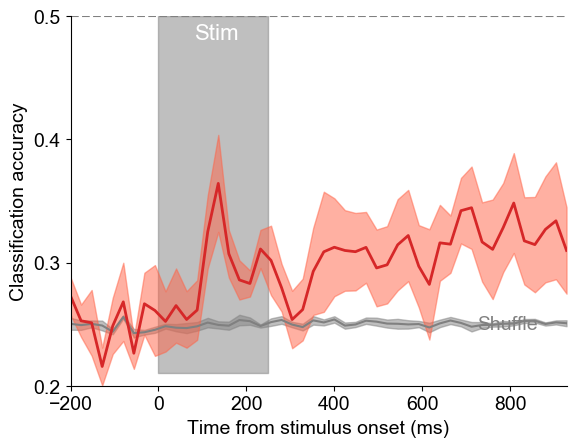

Mean delay accuracy: 0.30948079974516757
Mean delay S.D.: 0.021411209610975375


In [24]:
# Set up interp object and load pre-existing results. Skip if you ran previous cell.
interp_l1 = decode_eeg.Interpreter(clfr)
interp_l1.plot_acc(ylim=[.2,.5])

In [25]:
group_dict = {0:[11],1:[12]}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=4)

In [26]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata,idx = wrangl.select_labels(xdata,ydata,return_idx=True)
        
    beh = exp.load_behavior(isub)
    quads = np.array([int(i[1]) for i in beh['Quadrants']],dtype=int)[idx]

    train_idx = ydata == 11
    xdata_train, ydata_train = xdata[train_idx], quads[train_idx]
    xdata_test, ydata_test = xdata[~train_idx], quads[~train_idx]

    xdata_train, ydata_train = wrangl.balance_labels(xdata_train, ydata_train)
    xdata_train, ydata_train = wrangl.average_trials(xdata_train, ydata_train)

    xdata_test, ydata_test = wrangl.balance_labels(xdata_test, ydata_test)
    xdata_test, ydata_test = wrangl.average_trials(xdata_test, ydata_test)
    
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_custom_split(xdata_train,xdata_test,ydata_train,ydata_test):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5


No handles with labels found to put in legend.


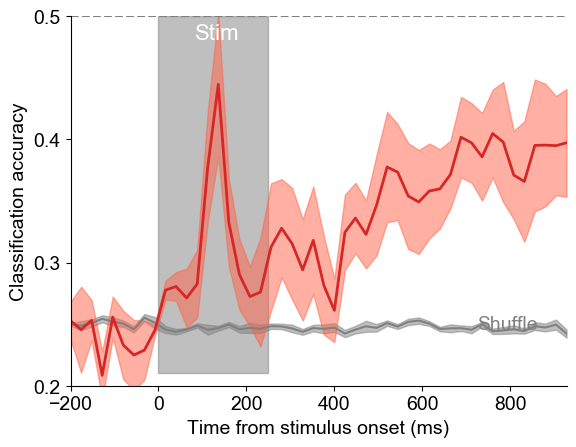

Mean delay accuracy: 0.35482056024010045
Mean delay S.D.: 0.03857240234744136


In [27]:
interp_h1 = decode_eeg.Interpreter(clfr)
interp_h1.plot_acc(ylim=[.2,.5])
interp = decode_eeg.Interpreter(clfr)

In [97]:
group_dict = {0:[11],1:[14]}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=4)

In [99]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata,idx = wrangl.select_labels(xdata,ydata,return_idx=True)
        
    beh = exp.load_behavior(isub)
    quads = np.array([int(i[1]) for i in beh['Quadrants']],dtype=int)[idx]

    train_idx = ydata == 11
    xdata_train, ydata_train = xdata[train_idx], quads[train_idx]
    xdata_test, ydata_test = xdata[~train_idx], quads[~train_idx]

    xdata_train, ydata_train = wrangl.balance_labels(xdata_train, ydata_train)
    xdata_train, ydata_train = wrangl.average_trials(xdata_train, ydata_train)

    xdata_test, ydata_test = wrangl.balance_labels(xdata_test, ydata_test)
    X_test_all, y_test = wrangl.average_trials(xdata_test, ydata_test)
    
    for X_train_all, _, y_train, _ in wrangl.train_test_split(xdata_train,ydata_train):

        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5


No handles with labels found to put in legend.


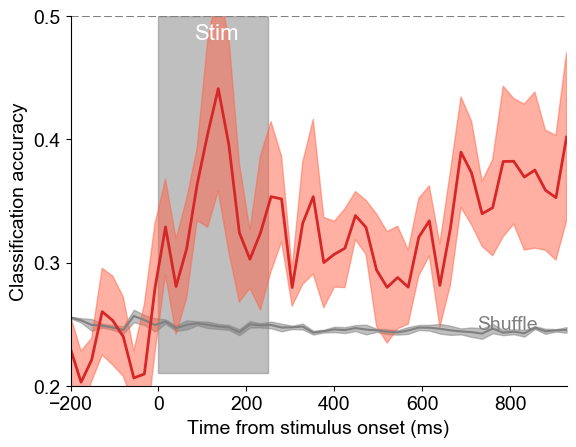

Mean delay accuracy: 0.3354573754789272
Mean delay S.D.: 0.035635832774041545


In [100]:
interp_l1f = decode_eeg.Interpreter(clfr)
interp_l1f.plot_acc(ylim=[.2,.5])
interp = decode_eeg.Interpreter(clfr)

# Combining and comparing

In [101]:
interp.acc = np.concatenate((interp_h1.acc[:,np.newaxis],interp_l1.acc[:,np.newaxis],interp_l1f.acc[:,np.newaxis]),1)
interp.acc_shuff = np.concatenate((interp_h1.acc_shuff[:,np.newaxis],interp_l1.acc_shuff[:,np.newaxis],interp_l1f.acc_shuff[:,np.newaxis]),1)

H1 mean delay accuracy: 0.35482056024010045
H1 mean delay S.D.: 0.03857240234744136
L1 mean delay accuracy: 0.30948079974516757
L1 mean delay S.D.: 0.021411209610975375
L1F mean delay accuracy: 0.3354573754789272
L1F mean delay S.D.: 0.035635832774041545


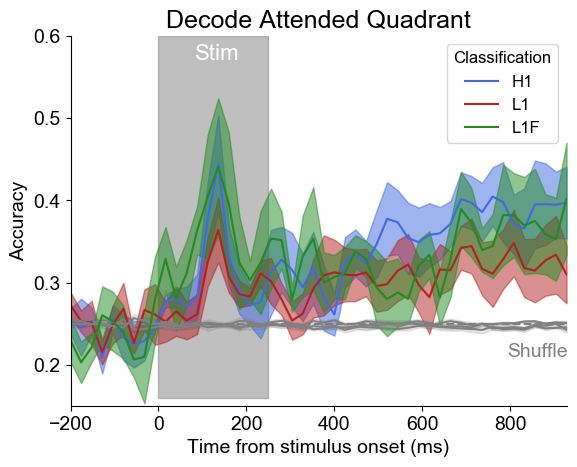

In [102]:
interp.plot_acc_subset(subset_list=['H1','L1','L1F'],chance=.25,ylim=[.15,.6],sig_ys=[.2,.21],title='Decode Attended Quadrant',savefig=False)

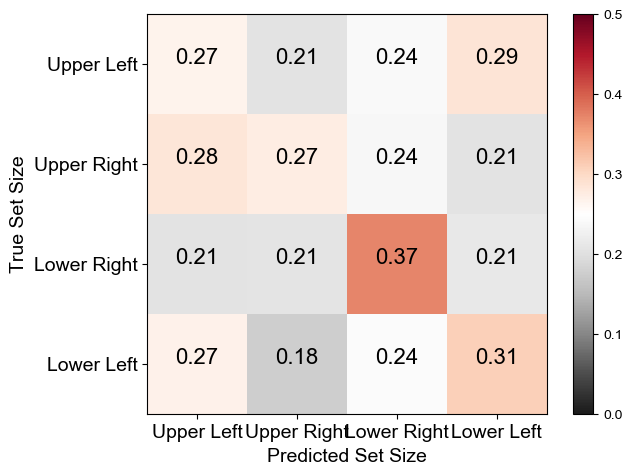

In [103]:
interp_l1.labels = ['Upper Left','Upper Right','Lower Right','Lower Left']
interp_l1.plot_conf_mat(upper=.5)

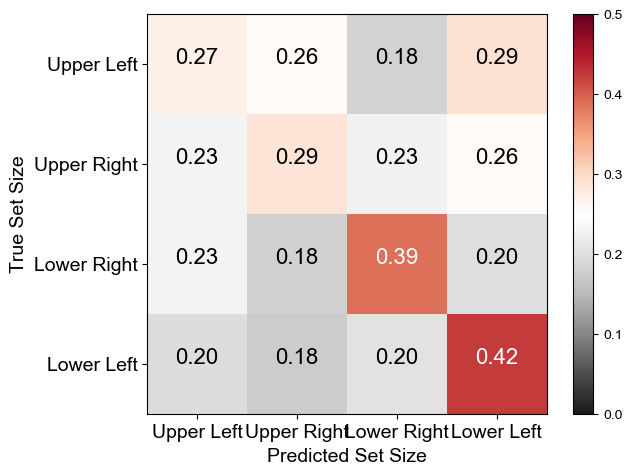

In [104]:
interp_h1.labels = ['Upper Left','Upper Right','Lower Right','Lower Left']
interp_h1.plot_conf_mat(upper=.5)

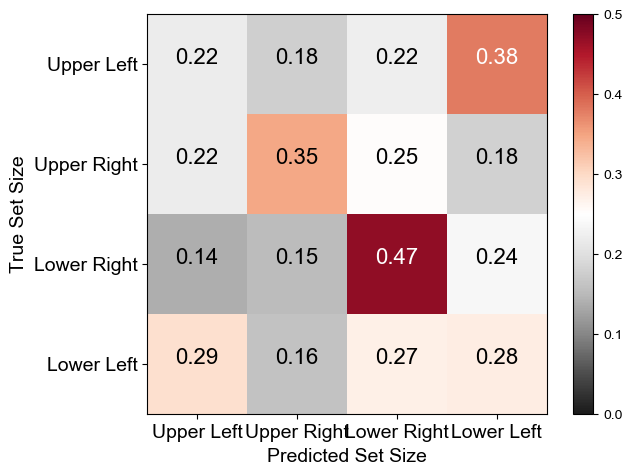

In [110]:
interp_l1f.labels = ['Upper Left','Upper Right','Lower Right','Lower Left']
interp_l1f.plot_conf_mat(upper=.5)

In [105]:
cm = np.mean(np.mean(np.mean(interp_h1.conf_mat,2)[:,clfr.t>200],1),0)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.27097744, 0.25773108, 0.18189644, 0.28939503],
       [0.23066003, 0.28634872, 0.22679537, 0.25619589],
       [0.23191717, 0.18110331, 0.38785835, 0.19912117],
       [0.1962199 , 0.17510223, 0.20379827, 0.4248796 ]])

In [106]:
def quadrant_conf_mat(cm):
    cm = np.mean(np.mean(np.mean(cm.conf_mat,2)[:,clfr.t>200],1),0)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig,axes = plt.subplots(2,2)
    c = np.empty((2,2)) 
    x = 0
    i = [0,0,1,1]
    ii = [0,1,1,0]
    for i,ii in zip(i,ii):
        c[0,0] = cm[x,0]
        c[0,1] = cm[x,1]
        c[1,1] = cm[x,2]
        c[1,0] = cm[x,3]
        axes[i,ii].imshow(c,cmap=plt.cm.RdGy_r,clim = (0,.5))    
        x += 1
        axes[i,ii].tick_params(axis='both',bottom=False,left=False,labelbottom=False,labelleft=False)
        thresh = np.percentile([0,.5], [25, 75]) #for font color readability
        for h, j in itertools.product(range(c.shape[0]), range(c.shape[1])):
            if c[h,j] > thresh[1] or c[h,j] < thresh[0]:
                color = 'white'
            else:
                color = 'black'
            axes[i,ii].text(j, h, format(c[h, j], '.2f' ),
                    horizontalalignment="center",
                    color=color,
                    fontsize=16)

        plt.tight_layout()

    plt.show()

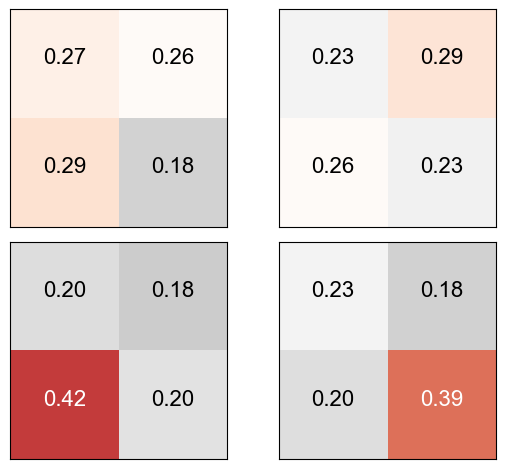

In [107]:
quadrant_conf_mat(interp_h1)

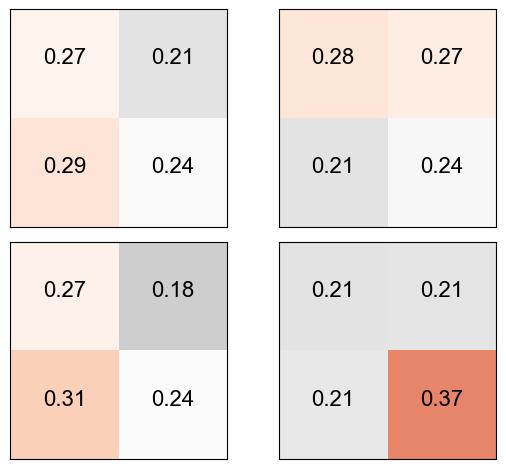

In [108]:
quadrant_conf_mat(interp_l1)

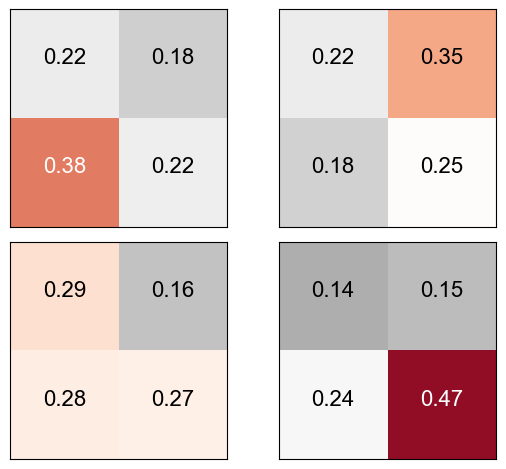

In [109]:
quadrant_conf_mat(interp_l1f)